<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Multiple Linear Regression.***

Estimated time needed: **15** minutes.

$ \ $

-----

## ***Objectives.***

After completing this lab you will be able to:

*   Use scikit-learn to implement Multiple Linear Regression.

*   Create a model, train it, test it and use the model.


$ \ $

-----

## ***Table of contents.***

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#understanding-data">Understanding the Data.</a></li>
        <li><a href="https://#reading_data">Reading the Data in.</a></li>
        <li><a href="https://#multiple_regression_model">Multiple Regression Model.</a></li>
        <li><a href="https://#prediction">Prediction.</a></li>
        <li><a href="https://#practice">Practice.</a></li>
    </ol>
</div>
<br>
<hr>


$ \ $

----


## ***Importing Needed packages.***

We import the packages that we will use in this module.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

$ \ $

-----

## ***Downloading Data.***

To download the data, we will use ***`!wget`*** to download it from IBM Object Storage.


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-12-25 13:06:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2022-12-25 13:06:11 (1.03 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



$ \ $

-----

## ***Understanding the Data (FuelConsumption.csv).***


We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


$ \ $

----

## ***Data reading.***


$(1)$ We read the data and save it in the variable df.

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


$ \ $

$(2)$ Let's select some features (columns) that we want to use for regression.


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


$ \ $

$(3)$ Let's plot Emission values with respect to Engine size:


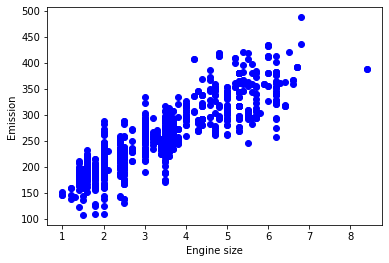

In [ ]:
#(1) creamos un grafico de dispersion que muestra la relacion entre cdf["ENGINESIZE"] y cdf["CO2EMISSIONS"]
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')

#(2) etiquetamos los ejes
plt.xlabel("Engine size")
plt.ylabel("Emission")

#(3) mostramos en pantalla nuestros resultados
plt.show()

$ \ $

$(4)$ $\color{aquamarine}{\text{(Train/Test)}}$ Split involves splitting the dataset into:

* Mutually exclusive training sets

* Mutually exclusive testing sets

after which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  $\color{yellow}{{ np.random.rand() }}$ function:


In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

$ \ $

$(5)$ We show on the screen the scatter plot between train["ENGINESIZE"] and train["CO2EMISSIONS"].


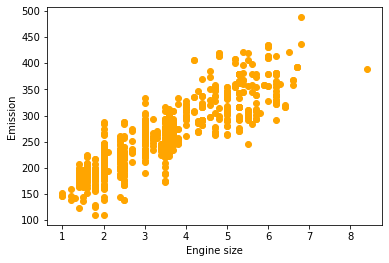

In [ ]:
#(1) creamos un grafico de dispersion entre train["ENGINESIZE"] y train["CO2EMISSIONS"]
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='orange')

#(2) etiquetamos los ejes
plt.xlabel("Engine size")
plt.ylabel("Emission")

#(3) mostramos en pantalla los resultados
plt.show()

$ \ $

$(6)$ $\color{aquamarine}{\text{Multiple regression model:}}$ In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [ ]:
#(1) importamos de la biblioteca de machine learning (sklearn) el modulo linear_model
from sklearn import linear_model

#(2) creamos un objeto de tipo regresion lineal
reg = linear_model.LinearRegression()

#(3) creamos dos objetos de tipo array
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

#(4) introducimos los dos objetos de tipo array en el objeto de regresion lineal
reg.fit(x, y)

#(5) mostramos en pantalla los resultados de los coeficientes de la regresion lineal y el intercepto
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)


Coefficients:  [[10.81932041  7.51016605  9.87278629]]
Intercept:  [62.57514958]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.




$ \ $

## ***Ordinary Least Squares (OLS).***

***OLS*** is a method for estimating the unknown parameters in a linear regression model. ***OLS*** chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

***OLS*** can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

$ \ $

$(7)$ We calculate the linear regression using x and having as a result y and also we show the mean square error.


In [ ]:
#(1) usamos la regresion lineal por medio de minimos cuadrados
y_hat= reg.predict(x)

#(2) calculamos el promedio del error cuadratico
mean_square = np.mean((y_hat - y) ** 2)

#(3) mostramos en pantalla el promedio del error cuadratico
print("Residual sum of squares:", mean_square)


Residual sum of squares: 504.28584144217433
